C:\Users\235451\AppData\Local\Temp\ipykernel_8864\3174063670.py:23: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  scores_dfs[model] = pd.read_csv(os.path.join(dir, scores_file))
C:\Users\235451\AppData\Local\Temp\ipykernel_8864\3174063670.py:23: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  scores_dfs[model] = pd.read_csv(os.path.join(dir, scores_file))
C:\Users\235451\AppData\Local\Temp\ipykernel_8864\3174063670.py:23: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  scores_dfs[model] = pd.read_csv(os.path.join(dir, scores_file))
C:\Users\235451\AppData\Local\Temp\ipykernel_8864\3174063670.py:23: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  scores_dfs[model] = pd.read_csv(os.path.join(dir, scores_file))
C:\Users\235451\AppData\Local\Temp\ipykernel_8864\31

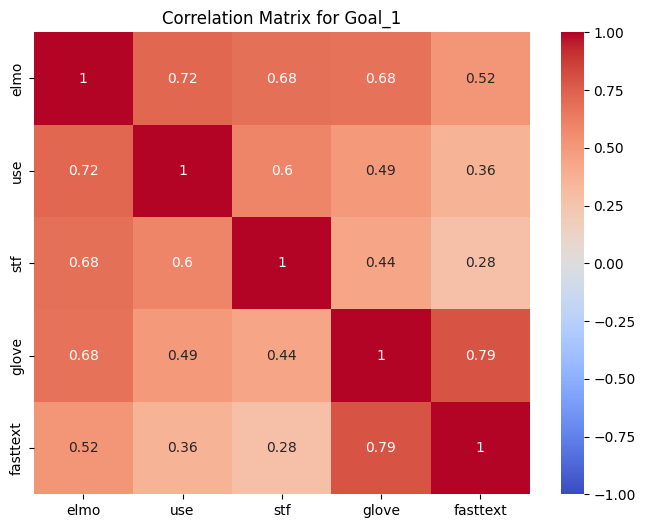

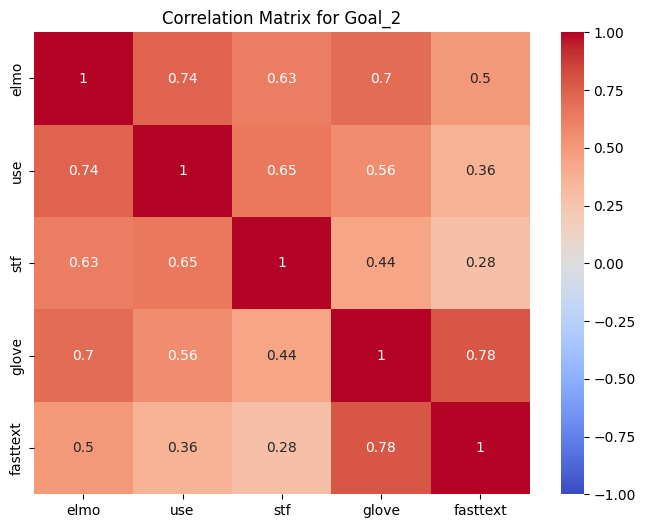

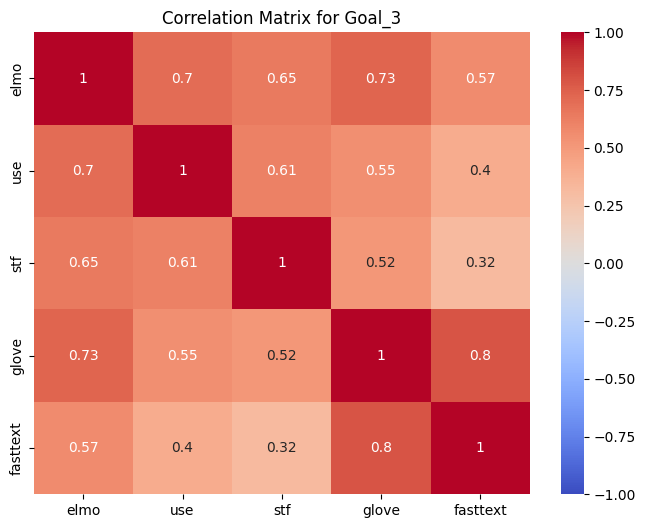

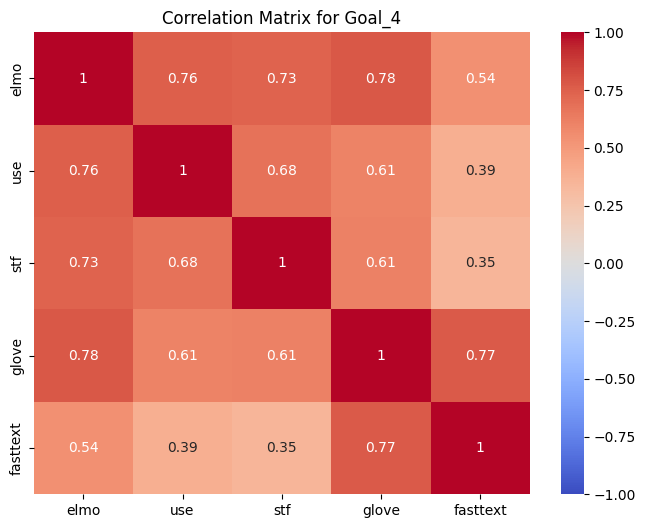

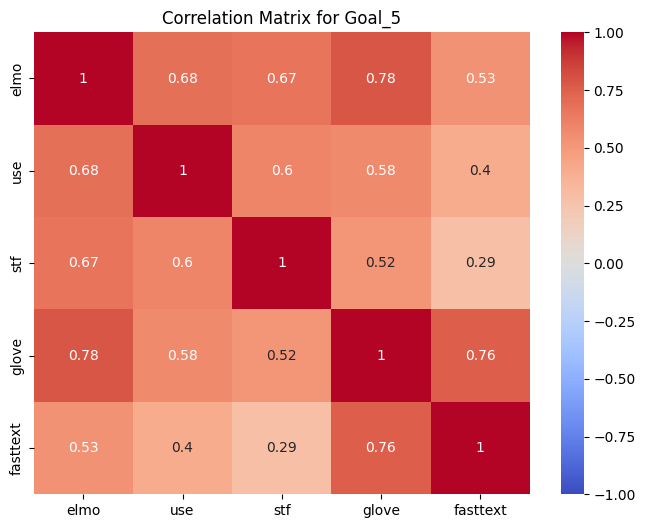

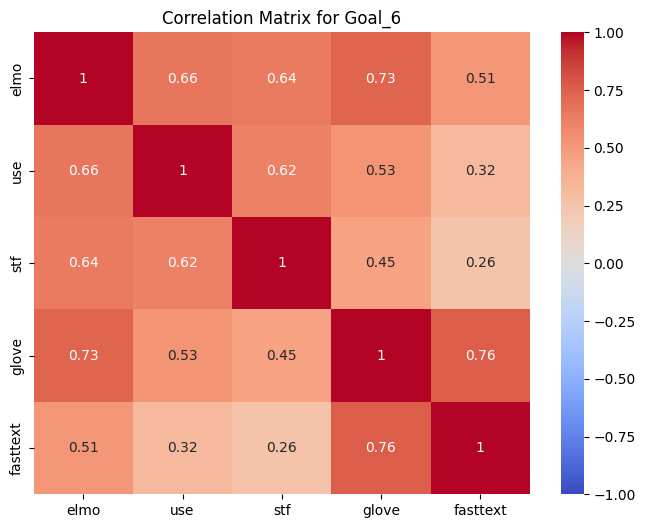

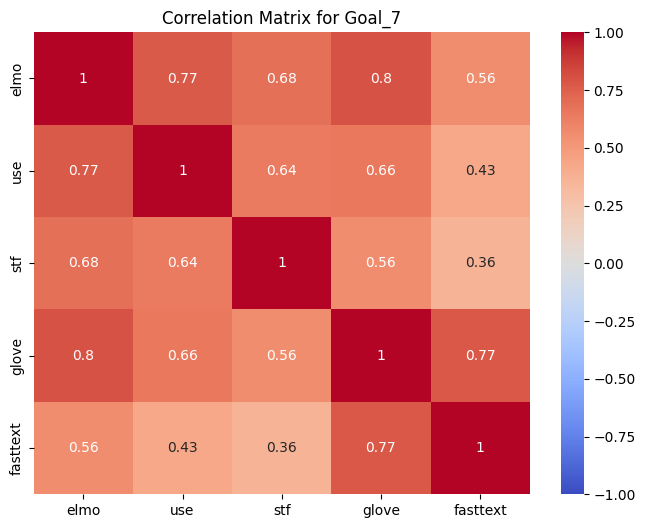

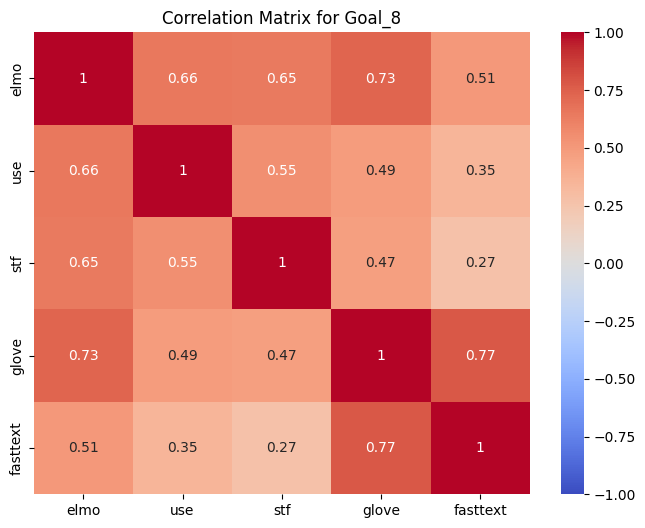

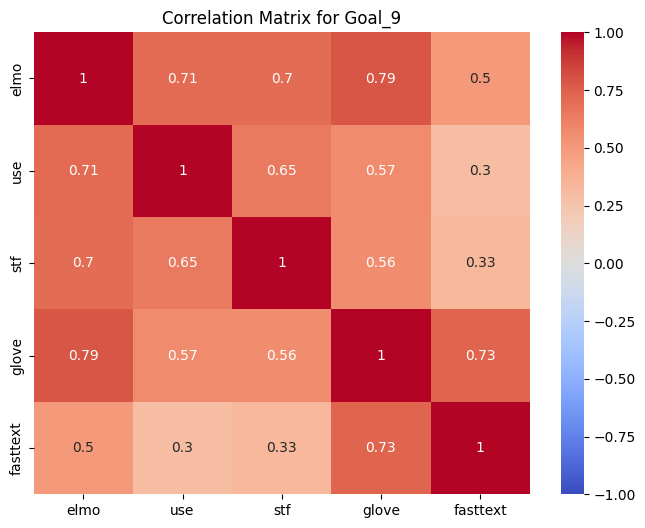

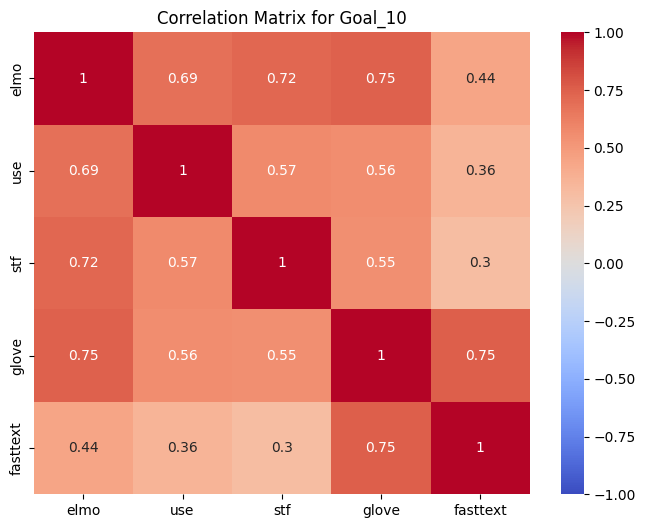

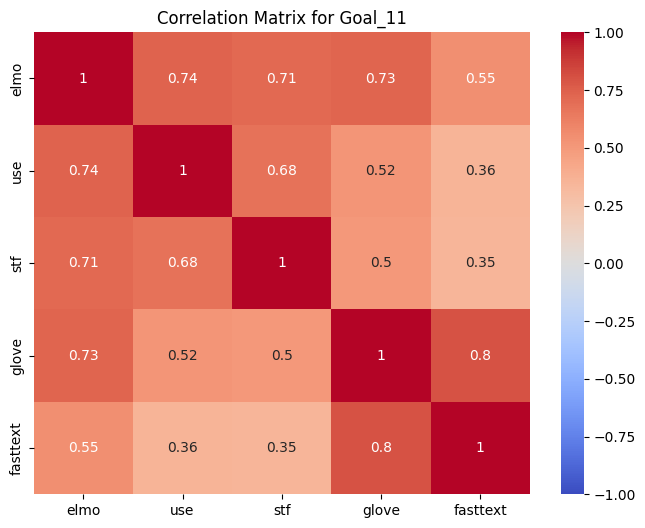

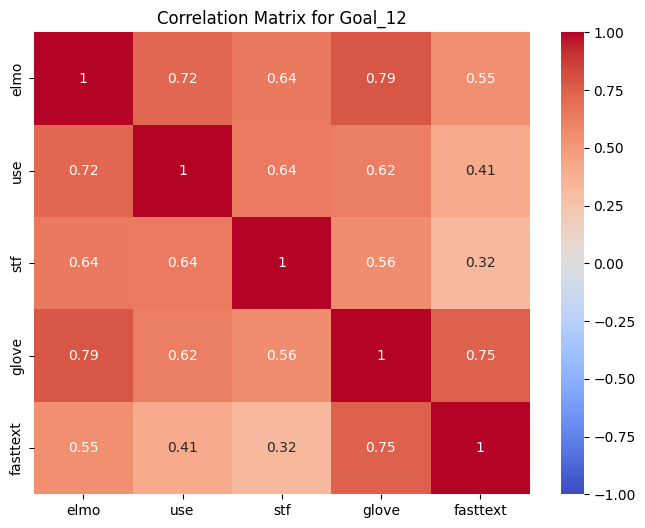

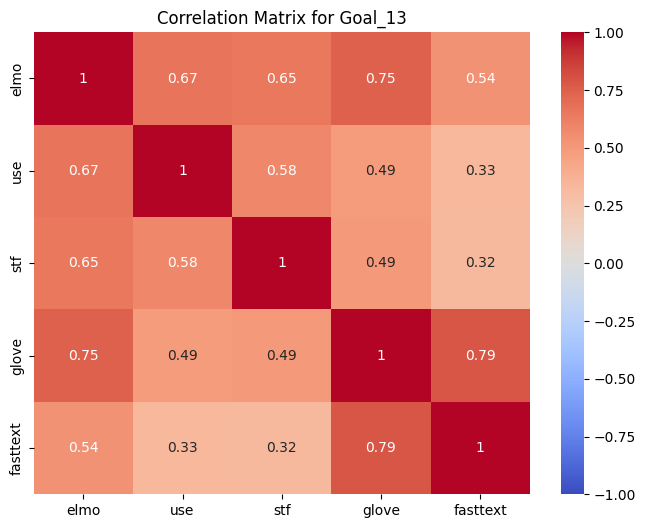

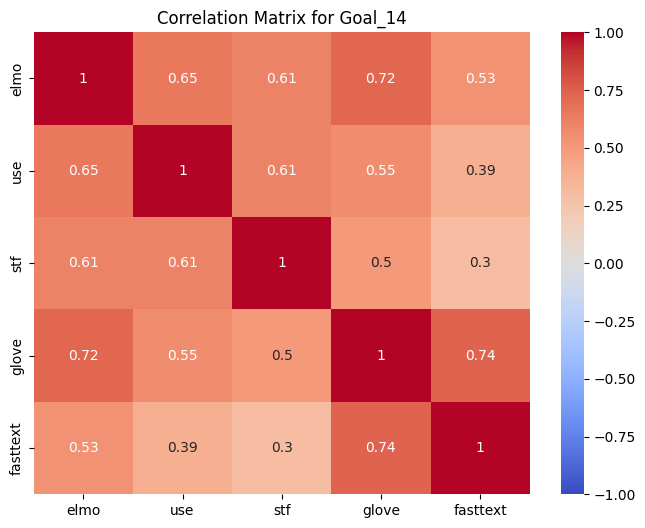

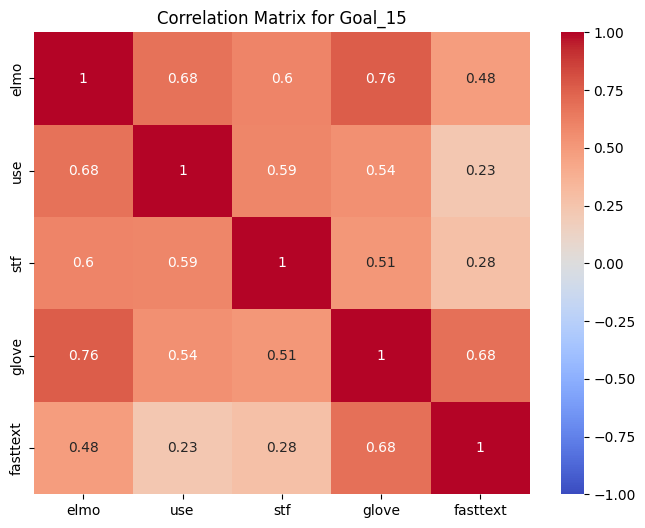

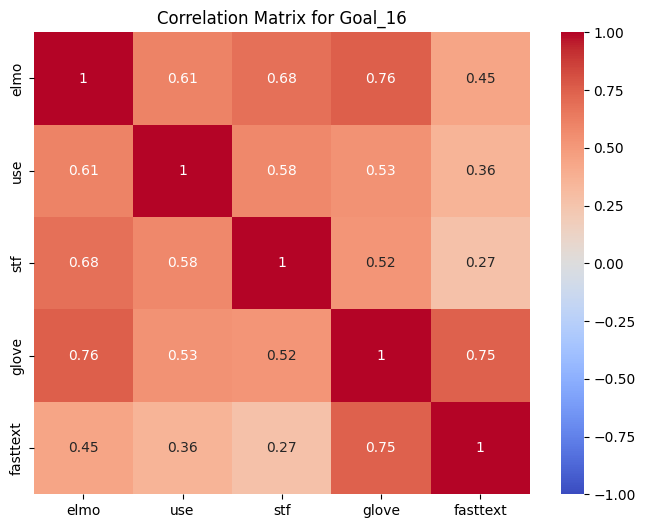

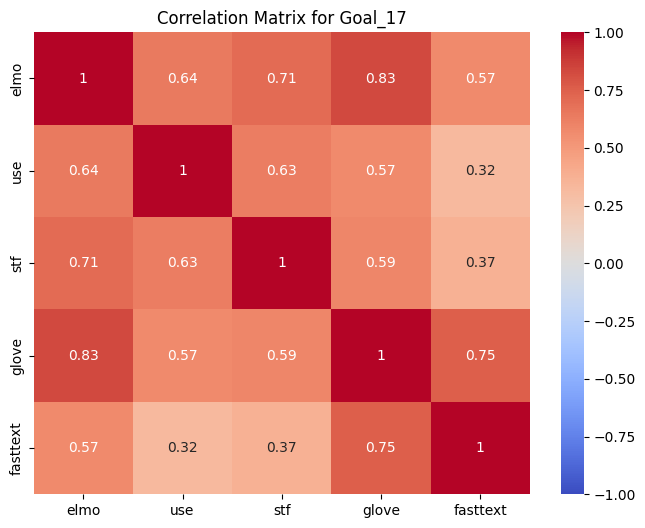

In [1]:
import pandas as pd
import itertools
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and file patterns
models = ['elmo', 'use', 'stf', 'glove', 'fasttext']  # Add other models you have
dir =  'C:/Ebooks/code/sts-measures/scores'
goals_pattern = '_goals.csv'
scores_pattern = '_scores.csv'

# Initialize a dictionary to store the DataFrames for each model
goals_dfs = {}
scores_dfs = {}

# Load the goals and scores data for each model
for model in models:
    goals_file = f'{model}{goals_pattern}'
    scores_file = f'{model}{scores_pattern}'
    
    goals_dfs[model] = pd.read_csv(os.path.join(dir, goals_file))
    scores_dfs[model] = pd.read_csv(os.path.join(dir, scores_file))

# Initialize a dictionary to store correlation results
correlation_results = {}

# List of goal columns
goal_columns = [f'Goal_{i}_Similarity' for i in range(1, 18)]

# Loop over each goal to compute correlations
for goal in goal_columns:
    # Extract the similarity scores for each model
    goal_scores = {}
    for model in models:
        goal_scores[model] = pd.to_numeric(scores_dfs[model][goal], errors='coerce')
    
    # Create a DataFrame from the goal scores
    goal_scores_df = pd.DataFrame(goal_scores)
    
    # Drop rows with any NaN values
    goal_scores_df = goal_scores_df.dropna()
    
    # Compute the pairwise Pearson correlation coefficients
    correlations = goal_scores_df.corr(method='pearson')
    
    correlation_results[goal] = correlations

# Plot heatmaps for each goal
for goal, corr_matrix in correlation_results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    dir =  'C:/Ebooks/code/sts-measures/corr_matrix'
    goal = goal.split('_')[0] + '_' + goal.split('_')[1]
    corr_matrix.to_csv(os.path.join(dir, f'{goal}_corr_matrix.csv'))
    plt.title(f'Correlation Matrix for {goal}')
    plt.show()
